0.8320088653229083 0.003207784582723562


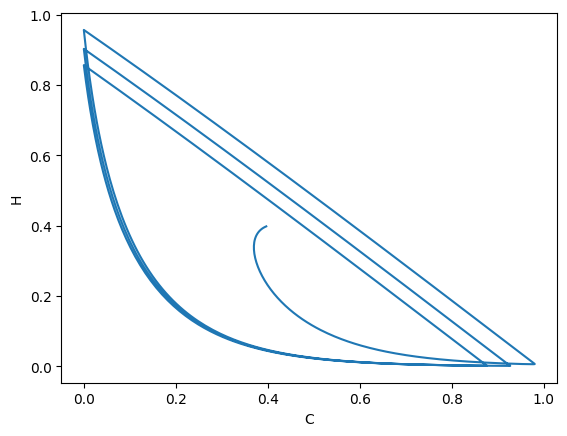

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Xc = 0.4
Xh = 0.4
Xw = 0.2

dt = 0.1
t_max = 2000

A = 0.15
B = 1

C_result = np.zeros(int(t_max/dt))
H_result = np.zeros(int(t_max/dt))

for i in range(int(t_max/dt)):
    Xc = Xc + (A * Xw - B * Xc * Xh**2) * dt
    Xh = Xh + (B * Xc * Xh**2 - Xh * Xw) * dt
    Xw = Xw + (Xh * Xw - A * Xw) * dt
    C_result[i] = Xc
    H_result[i] = Xh

plt.plot(C_result, H_result)
plt.xlabel('C')
plt.ylabel('H')
print(C_result[-1], H_result[-1])



2e-323 0.9841303655513569
0.6289125295580056 0.01083367891874312
0.004268251841647429 0.6694941166033326
0.9999999999999989 -2.3972657608846035e-19


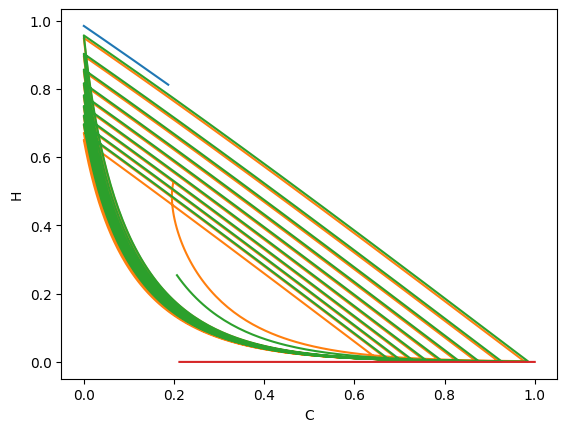

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Xc = 0.3
Xh = 0.2
Xw = 0.5

dt = 0.1
t_max = 5000

A = 0.15
B = 1

C_result = np.zeros(int(t_max/dt))
H_result = np.zeros(int(t_max/dt))

for j in np.linspace(0, 0.8, 4):

    Xw = j
    Xc = 0.2
    Xh = 1  - Xw - Xc

    for i in range(int(t_max/dt)):
        Xc = Xc + (A * Xw - B * Xc * Xh**2) * dt
        Xh = Xh + (B * Xc * Xh**2 - Xh * Xw) * dt
        Xw = Xw + (Xh * Xw - A * Xw) * dt
        C_result[i] = Xc
        H_result[i] = Xh

    plt.plot(C_result, H_result)
    plt.xlabel('C')
    plt.ylabel('H')
    print(C_result[-1], H_result[-1])


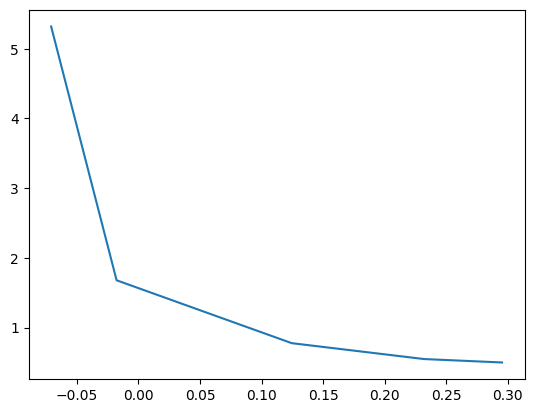

In [31]:
from scipy import optimize

dt = 0.1
t  = 5

c = 0.3
w = 0.2
h = 0.5

c = 1 - w - h

Dc = 0.05
Dh = 0.005
Dw = 0.005

A = 0.15
B = 1

c_result = np.zeros(int(t/dt/10))
h_result = np.zeros(int(t/dt/10))
w_result = np.zeros(int(t/dt/10))

N_c = A * w - B * c * h**2
N_h = B * c * h**2 - h * w
N_w = h * w - A * w - B * c


for j in range(int(t/dt)):

    '''
    # Linear term for c, h, w
    Lc = Dc * (np.roll(c, -1) + np.roll(c, -1) - 2 * c) / (dx**2)
    Lh = Dh * (np.roll(h, -1) + np.roll(h, -1) - 2 * h) / (dx**2)
    Lw = Dw * (np.roll(w, -1) + np.roll(w, -1) - 2 * w) / (dx**2)
    #print(Lc, Lh, Lw)
    '''

    # Nonlinear term, N(t), N(t-\delta t) for c, h, w
    N_c_past = N_c
    N_h_past = N_h
    N_w_past = N_w

    Lc = 0
    Lh = 0
    Lw = 0


    def func(x):
        c_next = x[0]
        h_next = x[1]
        w_next = x[2]
        return [(A * w_next - B * c_next * h_next**2 + Lc) * dt + c - c_next,
                (B * c_next * h_next**2 - h_next * w_next + Lh) * dt + h - h_next,
                (h_next * w_next - A * w_next - B * c_next + Lw) * dt + w - w_next]

    def jac(x):
        c_next = x[0]
        h_next = x[1]
        w_next = x[2]
        return [[-B * h_next**2 * dt - 1, -2 * B * c_next * h_next * dt, A * dt],
                [B * h_next**2 * dt, (2 * B * c_next * h_next - w_next) * dt - 1, -h_next * dt],
                [0, w_next * dt, (h_next - A) * dt - 1]]
    
    
    result = optimize.root(func, [c, h, w], jac=jac, method='hybr')
    c = result.x[0]
    h = result.x[1]
    w = result.x[2]

    if (j % 10) == 0:
        c_result[int(j/10)] = c
        h_result[int(j/10)] = h
        w_result[int(j/10)] = w

plt.plot(c_result, h_result)

